In [2]:
import numpy as np
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()


import numpy as np
import matplotlib.pyplot as plt

import wandb
import pandas as pd
from typing import Dict


def get_runs_data(path: str, filter_dict: Dict) -> pd.DataFrame:
    api = wandb.Api()
    # Query the runs using the filter criteria and fetch required fields only
    runs = api.runs(path, filters=filter_dict, order="-created_at", per_page=1000)

    # Create a list of dictionaries containing required fields for each run
    data_list = []
    for run in runs:
        data_list.append(
            {
                "setting": run.config.get("setting"),
                "expert_size": run.config.get("expert_size"),
                "ad_min": run.config.get("ad_min"),
                "transfer_violate_rate": run.summary["transfer_violate_rate"],
                "transfer_mean_length": run.summary["transfer_mean_length"],
                "transfer_successful_rate": run.summary["transfer_successful_rate"],
                "lamb": run.config.get("lamb"),
            }
        )

    # Create a pandas dataframe with the list of dictionaries
    df = pd.DataFrame(data_list)

    return df

      setting  expert_size     ad_min  transfer_violate_rate  \
0    setting3          100          0                    1.0   
1    setting4          100          0                    1.0   
2    setting2          100          0                    0.0   
3    setting1          100          0                    1.0   
4    setting2           50          0                    0.0   
..        ...          ...        ...                    ...   
103  setting3           10         -5                    0.0   
104  setting3           10  -Infinity                    0.0   
105  setting3           10         -5                    0.0   
106  setting3          100  -Infinity                    0.0   
107  setting3          100         -5                    0.0   

     transfer_mean_length  transfer_successful_rate  lamb  
0                     6.0                       1.0   0.5  
1                     5.0                       1.0   0.5  
2                     6.0                       1.0

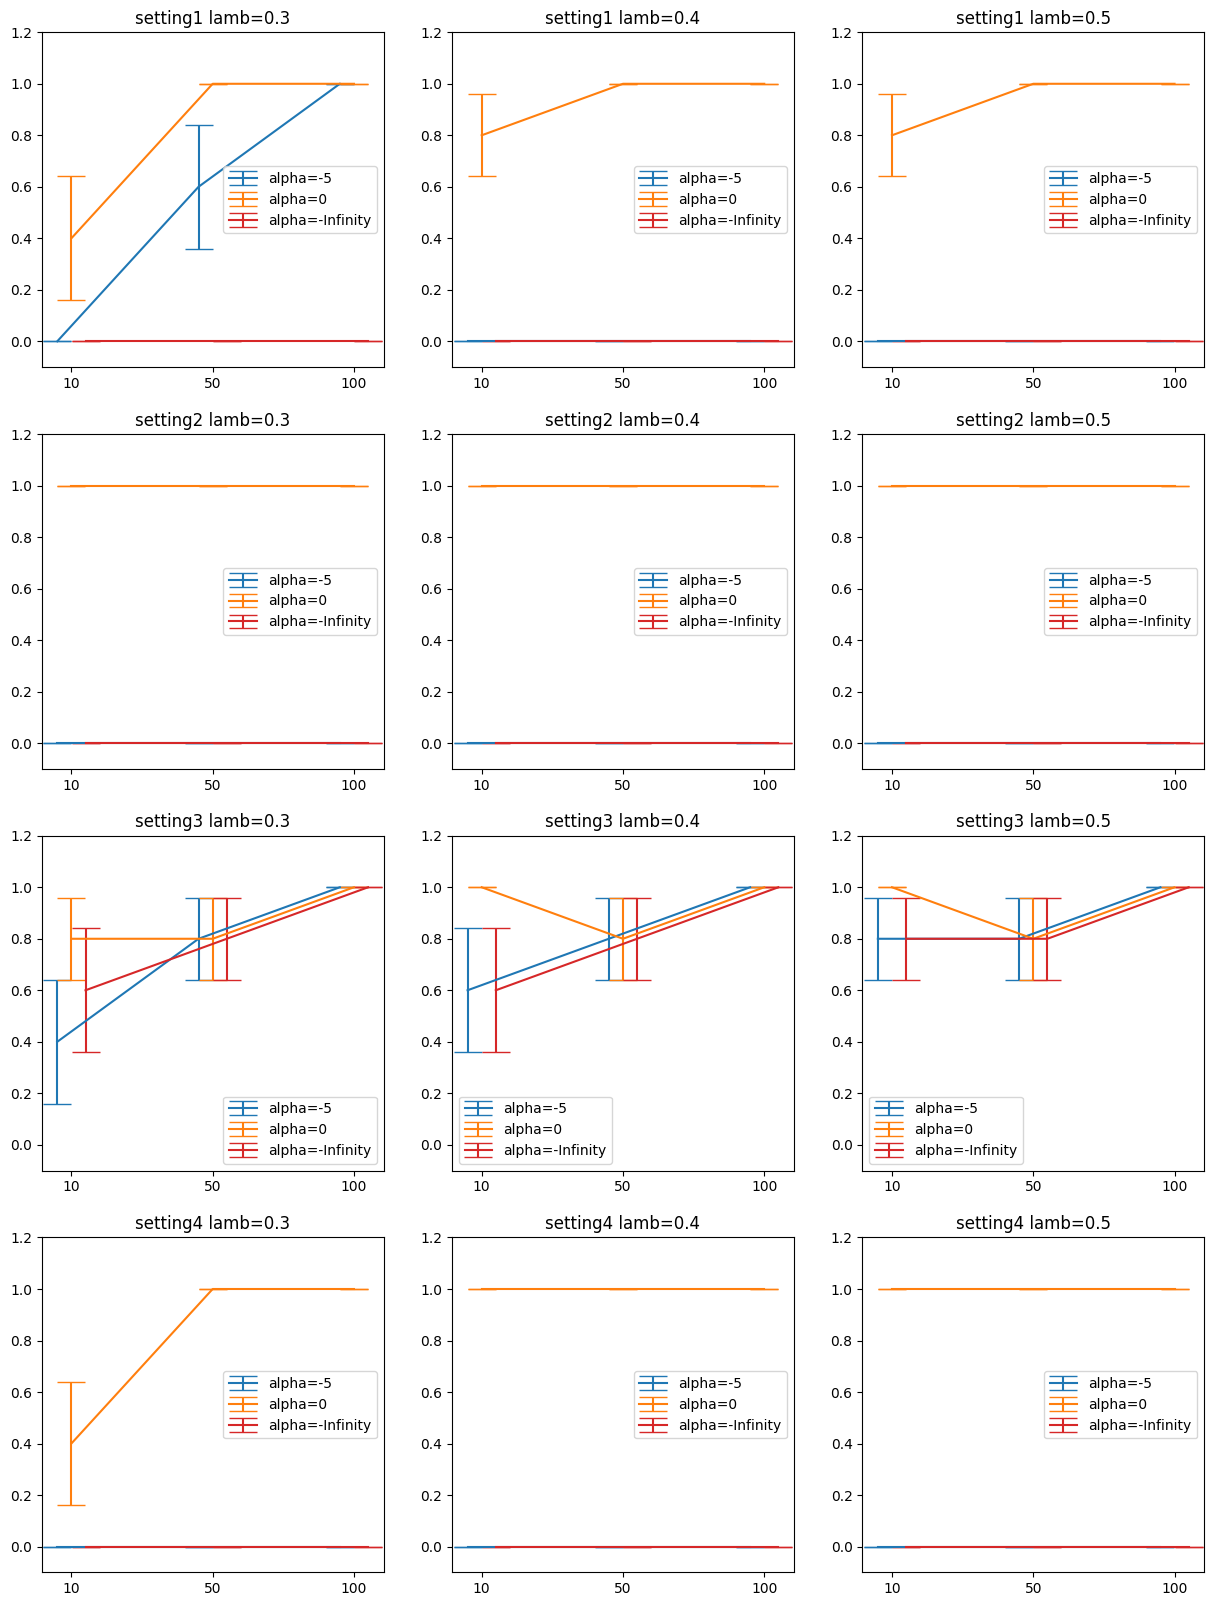

In [6]:
# Get original dataframe
from matplotlib.backends.backend_pdf import PdfPages
runs_data = get_runs_data(
    "quangr/grid_world",
    {
        # "state": "finished"
    },
)
df = pd.DataFrame(runs_data)
print(df)
color=['tab:blue','tab:orange','tab:red','tab:green']
fig, axes = plt.subplots( len(df['setting'].unique()),len(df['lamb'].unique()),figsize=(15,5*len(df['setting'].unique())))
shape=['o','x','*','1']
grouped = df.groupby(['setting','lamb'])
bar_width=0.2
for i, (group, data) in enumerate(grouped):
    plt.sca(axes.ravel()[i])
    grouped_data = data.groupby(['expert_size','ad_min'])['transfer_successful_rate'].agg(['mean', 'std']).reset_index()#.sort_values(by=['tag'], key=lambda x: x.map(custom_dict))
    x = np.arange(len(grouped_data['expert_size'].unique()))
    for j,(tag,data) in enumerate(grouped_data.groupby('ad_min',sort=False)):
        offset = (j - 0.5*(len(df['ad_min'].unique())-1)) * 0.1
        # plt.plot((x + offset)[:len(data['mean'])], data['mean'], marker=shape[j], mec='r', mfc='w', label=str(tag), color=color[j])
        # plt.errorbar((x + offset)[:len(data['mean'])], data['mean'],yerr=np.nan_to_num(data['std']), capsize=10,  label=str(tag), color=color[j])
        # plt.bar((x + offset)[:len(data['mean'])], data['mean'], yerr=data['mean']*(1-data['mean']), capsize=10,  label=str(tag), color=color[j],width=0.1)
        plt.errorbar((x + offset )[:len(data['mean'])], data['mean'],yerr=data['mean']*(1-data['mean']), capsize=10,  label=f"alpha={str(tag)}", color=color[j])
    plt.title(f'{group[0]} lamb={group[1]}')
    plt.ylim(-0.1,1.2)
    plt.xticks(x, grouped_data['expert_size'].unique())
    # plt.yticks(np.arange(-1,1, 0.2))
    # plt.axhline(y=0.1, color='r', linestyle='dashdot')
    plt.legend()
with PdfPages('grid_hp_transfer_sr.pdf') as pdf:
    pdf.savefig(fig)

      setting  expert_size     ad_min  transfer_violate_rate  \
0    setting3          100          0                    1.0   
1    setting4          100          0                    1.0   
2    setting2          100          0                    0.0   
3    setting1          100          0                    1.0   
4    setting2           50          0                    0.0   
..        ...          ...        ...                    ...   
102  setting3           10         -5                    0.0   
103  setting3           10  -Infinity                    0.0   
104  setting3           10         -5                    0.0   
105  setting3          100  -Infinity                    0.0   
106  setting3          100         -5                    0.0   

     transfer_mean_length  transfer_successful_rate  lamb  
0                     6.0                       1.0   0.5  
1                     5.0                       1.0   0.5  
2                     6.0                       1.0

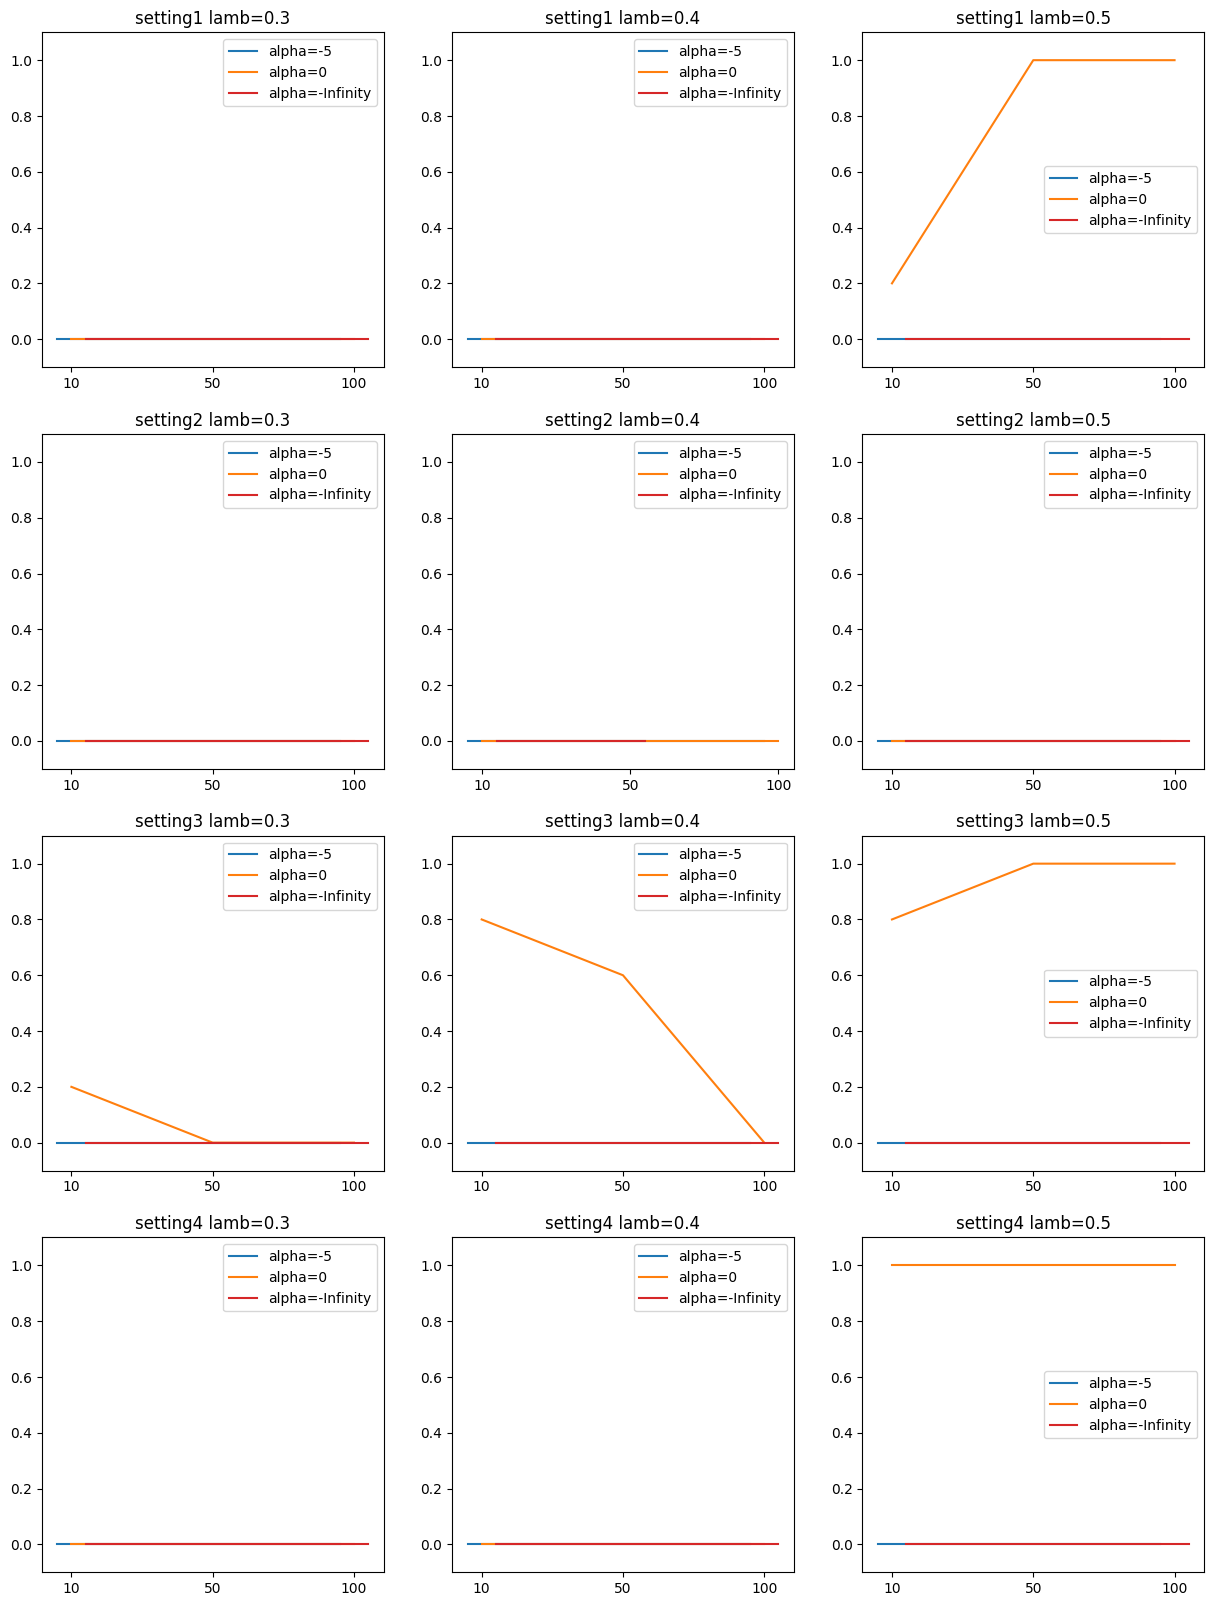

In [7]:
# Get original dataframe
runs_data = get_runs_data(
    "quangr/grid_world",
    {
        "state": "finished"
    },
)
df = pd.DataFrame(runs_data)
print(df)
color=['tab:blue','tab:orange','tab:red','tab:green']
fig, axes = plt.subplots( len(df['setting'].unique()),len(df['lamb'].unique()),figsize=(15,5*len(df['setting'].unique())))
shape=['o','x','*','1']
grouped = df.groupby(['setting','lamb'])
bar_width=0.2
for i, (group, data) in enumerate(grouped):
    plt.sca(axes.ravel()[i])
    grouped_data = data.groupby(['expert_size','ad_min'])['transfer_violate_rate'].agg(['mean', 'std']).reset_index()#.sort_values(by=['tag'], key=lambda x: x.map(custom_dict))
    x = np.arange(len(grouped_data['expert_size'].unique()))
    for j,(tag,data) in enumerate(grouped_data.groupby('ad_min',sort=False)):
        offset = (j - 0.5*(len(df['ad_min'].unique())-1)) * 0.1
        # plt.plot((x + offset)[:len(data['mean'])], data['mean'], marker=shape[j], mec='r', mfc='w', label=str(tag), color=color[j])
        # plt.errorbar((x + offset)[:len(data['mean'])], data['mean'],yerr=np.nan_to_num(data['std']), capsize=10,  label=str(tag), color=color[j])
        plt.errorbar((x + offset )[:len(data['mean'])], data['mean'], capsize=10,  label=f"alpha={str(tag)}", color=color[j])
    plt.title(f'{group[0]} lamb={group[1]}')
    plt.ylim(-0.1,1.1)
    plt.xticks(x, grouped_data['expert_size'].unique())
    # plt.yticks(np.arange(-1,1, 0.2))
    # plt.axhline(y=0.1, color='r', linestyle='dashdot')
    plt.legend()
with PdfPages('grid_hp_transfer_vr.pdf') as pdf:
    pdf.savefig(fig)